***import libraries***

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


***load datasets***

In [2]:
train=pd.read_csv(r'C:\Users\DELL\Downloads\train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test=pd.read_csv(r'C:\Users\DELL\Downloads\test.csv')

In [5]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892.0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893.0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894.0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895.0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896.0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304.0,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305.0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306.0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307.0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


***Datasets Information***

In [6]:
print("Number of Passengers in Train Dataset: " +str(len(train)))

Number of Passengers in Train Dataset: 891


In [7]:
print("Number of Passengers in Test Dataset: " +str(len(train)))

Number of Passengers in Test Dataset: 891


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***DATA ANALYSIS***

In [10]:
#total sum of NaN values the particular column have
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

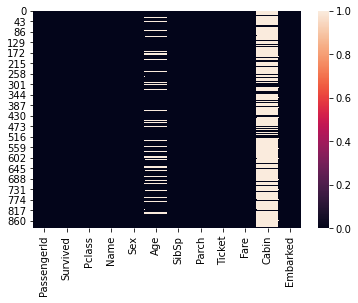

In [11]:
sns.heatmap(train.isnull())

In [12]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

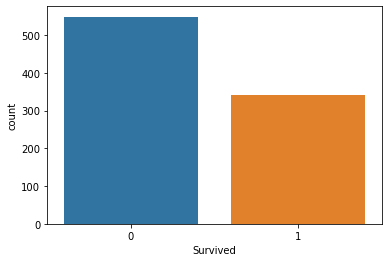

In [13]:
#The passengers that are survived in TRAIN dataset
sns.countplot(x='Survived', data= train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

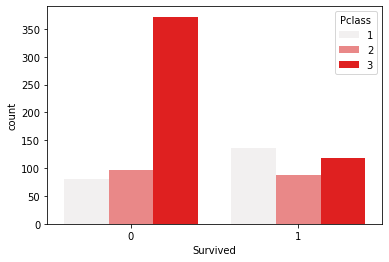

In [14]:
#Number of passengers that are survived based on passenger class in TRAIN dataset

sns.countplot(x='Survived',hue='Pclass',color='red', data= train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

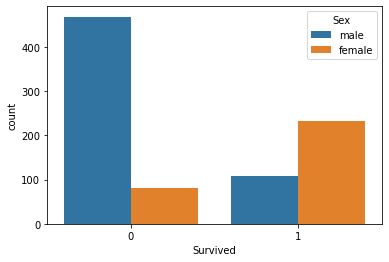

In [15]:
#Number of passengers that are survived based on Sex in TRAIN dataset
sns.countplot(x='Survived',hue='Sex', data= train)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

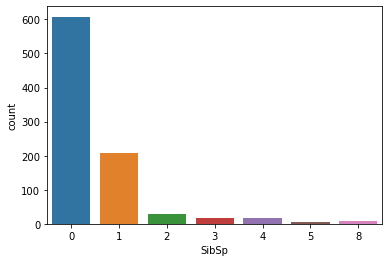

In [16]:
#Number of siblings or spouses in TRAIN dataset
sns.countplot(x='SibSp', data= train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

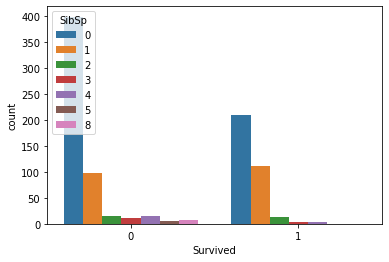

In [17]:
#Number of passengers that are survived based on siblings in TRAIN dataset
sns.countplot(x='Survived',hue='SibSp', data= train)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

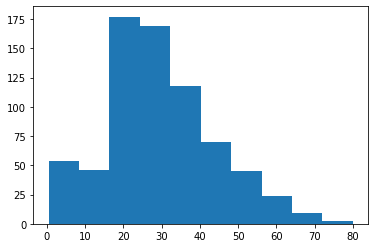

In [18]:
#frequency of passengers group by Age 
plt.hist(x='Age',data= train)

In [19]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

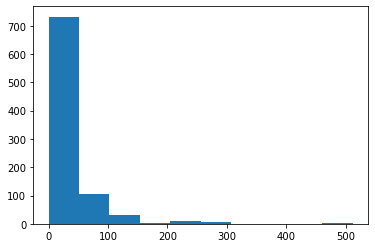

In [20]:
#frequency of passengers group by Fare 
plt.hist(x='Fare',data= train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

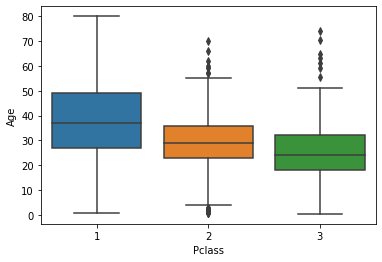

In [21]:
#boxplot between passengers class and Age
sns.boxplot(x='Pclass',y='Age',data=train)

***DATA WRANGLING in TRAIN Dataset***

In [22]:
sex=pd.get_dummies(train["Sex"],drop_first=True)

In [23]:
emb=pd.get_dummies(train["Embarked"],drop_first=True)
emb

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [24]:
pcl=pd.get_dummies(train["Pclass"],drop_first=True)

In [25]:
pcl

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [26]:
#concatenation of new attributes
train=pd.concat([train,sex,pcl,emb],axis=1)

In [27]:
#drop unnecessary columns
train.drop(['Pclass','Sex','Embarked','Cabin','Name','Ticket'],axis=1,inplace=True)

In [28]:
train

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,1,1,0,0,1
887,888,1,19.0,0,0,30.0000,0,0,0,0,1
888,889,0,NaN,1,2,23.4500,0,0,1,0,1
889,890,1,26.0,0,0,30.0000,1,0,0,0,0


In [29]:
#handle null values
null={'Age':round(np.mean(train['Age']))}
train=train.fillna(null)

In [30]:
train.isnull().sum()

PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
2              0
3              0
Q              0
S              0
dtype: int64

***DATA WRANGLING in TEST Dataset***

In [31]:
test.isnull().sum()

PassengerId      1
Pclass           0
Name             0
Sex              0
Age             85
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         1
dtype: int64

In [32]:
sex=pd.get_dummies(test['Sex'],drop_first=True)

In [33]:
emb=pd.get_dummies(test["Embarked"],drop_first=True)
emb

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
412,0,1
413,0,1
414,0,0
415,0,1


In [34]:
pcl=pd.get_dummies(test["Pclass"],drop_first=True)

In [35]:
#concatenation of new attributes
test=pd.concat([test,sex,pcl,emb],axis=1)

In [36]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,2,3,Q,S
0,892.0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,1,1,0
1,893.0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,1
2,894.0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0,1,0
3,895.0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,1,0,1
4,896.0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304.0,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,0,0,1,0,1
413,1305.0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,0,1,0,1
414,1306.0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0,0,0,0
415,1307.0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,0,1,0,1


In [37]:
#drop unnecessary columns
test.drop(['Pclass','Sex','Embarked','Cabin','Name','Ticket'],axis=1,inplace=True)

In [38]:
test

,PassengerId,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,892.0,34.5,0,0,7.8292,1,0,1,1,0
1,893.0,47.0,1,0,7.0000,0,0,1,0,1
2,894.0,62.0,0,0,9.6875,1,1,0,1,0
3,895.0,27.0,0,0,8.6625,1,0,1,0,1
4,896.0,22.0,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
412,1304.0,28.0,0,0,7.7750,0,0,1,0,1
413,1305.0,NaN,0,0,8.0500,1,0,1,0,1
414,1306.0,39.0,0,0,108.9000,0,0,0,0,0
415,1307.0,38.5,0,0,7.2500,1,0,1,0,1


In [39]:
#handle null values
null={'Age':round(np.mean(test['Age']))}
test=test.fillna(null)

In [40]:
test.isnull().sum()

PassengerId    1
Age            0
SibSp          0
Parch          0
Fare           1
male           0
2              0
3              0
Q              0
S              0
dtype: int64

In [41]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [42]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

***we are using LOGISTIC REGRESSION MODEL***

In [43]:
logmodel=LogisticRegression(solver='liblinear') #define model
#fit model
logmodel.fit(X_train ,y_train)  

LogisticRegression(solver='liblinear')

In [44]:
predictions=logmodel.predict(X_test)

In [45]:
#EVALUATION
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85        55
           1       0.86      0.54      0.67        35

    accuracy                           0.79        90
   macro avg       0.81      0.74      0.76        90
weighted avg       0.80      0.79      0.78        90



In [46]:
print(confusion_matrix(y_test,predictions))

[[52  3]
 [16 19]]


***ACCURACY of our MODEL***

In [49]:
print(accuracy_score(y_test,predictions))

0.7888888888888889


In [53]:
test_pred=logmodel.predict(test)

In [51]:
test.isnull().sum()

PassengerId    1
Age            0
SibSp          0
Parch          0
Fare           1
male           0
2              0
3              0
Q              0
S              0
dtype: int64

In [52]:
test.dropna(inplace=True)

In [54]:
print(test_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1
 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1
 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1
 1 1 1 1 0 1 0 0]


In [63]:
print(str(len(test_pred)))

415


In [62]:
print(str(len(test)))

415


In [58]:
test.reset_index(drop=True,inplace=True)

In [64]:
test

,PassengerId,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,892.0,34.5,0,0,7.8292,1,0,1,1,0
1,893.0,47.0,1,0,7.0000,0,0,1,0,1
2,894.0,62.0,0,0,9.6875,1,1,0,1,0
3,895.0,27.0,0,0,8.6625,1,0,1,0,1
4,896.0,22.0,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
410,1304.0,28.0,0,0,7.7750,0,0,1,0,1
411,1305.0,30.0,0,0,8.0500,1,0,1,0,1
412,1306.0,39.0,0,0,108.9000,0,0,0,0,0
413,1307.0,38.5,0,0,7.2500,1,0,1,0,1


In [73]:
subfile=pd.read_csv(r'C:\Users\DELL\Downloads\test.csv')
subfile['Survived']=test_pred
subfile.to_csv("subit.csv")

In [75]:
a=pd.read_csv(r'C:\Users\DELL\subit.csv')
a


,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,1
411,411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,0
412,412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,1
413,413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
